In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

loan_df = pd.read_csv("random_forest_challenge_df.csv")

In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
pd.get_dummies(loan_df)

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,loan_status_Approved,loan_status_Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1,0,1,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0,1,0,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,1,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,1,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,1,0,0,1,0,1
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0,1,0,1,1,0
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,1,1,0,0,1
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,1,1,0,1,0


In [9]:
start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=10, n_jobs=-1)
X = loan_df.drop('loan_status', 1)
Y = loan_df['loan_status']
X = pd.get_dummies(X)

print(f'{cross_val_score(rfc, X, Y, cv=10)}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

/tmp/ipykernel_66/596070386.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = loan_df.drop('loan_status', 1)


[0.9765808  0.95784543 0.95784543 0.9765808  0.97423888 0.9882904
 0.96955504 0.9765808  0.95784543 0.92957746]

Cross-validation time elapsed: 0.62 seconds.


<AxesSubplot: >

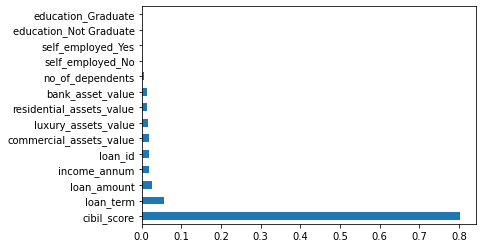

In [10]:
rfc.fit(X, Y)

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')